In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
clean_df = pd.read_csv('clean_df_1Mar2024.csv')

In [3]:
def categorize_age(age):
    if age < 18:
        return 0  # Category for minors
    elif age <= 64:
        return 1  # Category for adults
    else:
        return 2  # Category for seniors

# Column for age categories
clean_df['Vict_Age_Category'] = clean_df['Vict_Age'].apply(categorize_age)

In [4]:
data=clean_df

# Convert 'Date_Rptd' and 'DATE_OCC' to datetime
data['Date_Rptd'] = pd.to_datetime(data['Date_Rptd'], format='%m/%d/%Y %I:%M:%S %p')
data['DATE_OCC'] = pd.to_datetime(data['DATE_OCC'], format='%Y-%m-%d')


# Extract day of week, month, and year from 'DATE_OCC'
data['Day_of_Week'] = data['DATE_OCC'].dt.dayofweek
data['Month'] = data['DATE_OCC'].dt.month
data['Year'] = data['DATE_OCC'].dt.year

# Drop the original 'Date_Rptd' and 'DATE_OCC' columns
data = data.drop(['Date_Rptd', 'DATE_OCC'], axis=1)

# Convert 'Vict_Sex' and 'Vict_Descent' to dummy variables
categorical_to_convert = ['Vict_Sex', 'Region_Ethnic_Origin', 'Vict_Age_Category']
data = pd.get_dummies(data, columns=categorical_to_convert, drop_first=True)
data['Day_of_Week'] = data['Day_of_Week'].astype('category')
data['Month'] = data['Month'].astype('category')
data['Year'] = data['Year'].astype('category')

# Create dummy variables for these columns
data = pd.get_dummies(data, columns=['Day_of_Week', 'Month', 'Year'], drop_first=True)


# We will not convert 'LOCATION' due to its high cardinality
data.drop(['LOCATION', 'Vict_Descent', 'DR_NO'], axis=1, inplace=True)

In [5]:
data = data.drop(columns=['Crm_Cd_Desc', 'Crime_Category', 'Crm_Cd', 'AREA_NAME', 'Rpt_Dist_No', 'TIME_OCC', 'Vict_Age'], axis = 0)

In [6]:
data.columns

Index(['AREA', 'Part_1-2', 'LAT', 'LON', 'Avg_Temp', 'Avg_Dewpoint',
       'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure', 'Total_Precipitation',
       'Crime_Category_Code', 'Weapon_Reported', 'Vict_Sex_M', 'Vict_Sex_X',
       'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Vict_Age_Category_1',
       'Vict_Age_Category_2', 'Day_of_Week_1', 'Day_of_Week_2',
       'Day_of_Week_3', 'Day_of_Week_4', 'Day_of_Week_5', 'Day_of_Week_6',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015', 'Year_2016',
       'Year_2017', 'Year_2018', 'Year_2019', 'Year_2020', 'Year_2021',
       'Year_2022', 'Year_2023'],
      dtype='object')

In [7]:
X_svml_full = data.drop('Crime_Category_Code', axis=1)  # Features
y_svml_full = data['Crime_Category_Code']

In [8]:
X_svml_full_train, X_svml_full_test, y_svml_full_train, y_svml_full_test = train_test_split(X_svml_full, y_svml_full, test_size=0.2, random_state=42)

In [9]:
svml_full_model = LinearSVC(dual = False)

In [10]:
svml_full_model.fit(X_svml_full_train,  y_svml_full_train)

LinearSVC(dual=False)

In [11]:
y_pred_svml_full = svml_full_model.predict(X_svml_full_test)

# Accuracy
accuracy = accuracy_score(y_svml_full_test, y_pred_svml_full)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_svml_full_test, y_pred_svml_full))

# Confusion Matrix


Accuracy: 0.7344


/Users/elijah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elijah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.74      0.96      0.83    143531
           1       0.42      0.53      0.47     41588
           2       0.97      0.62      0.75     92088
           3       0.52      0.16      0.25     26344
           4       0.00      0.00      0.00     13324
           5       0.90      0.91      0.90    187161
           6       0.40      0.60      0.48     54380
           7       0.00      0.00      0.00     18345

    accuracy                           0.73    576761
   macro avg       0.49      0.47      0.46    576761
weighted avg       0.72      0.73      0.71    576761



/Users/elijah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


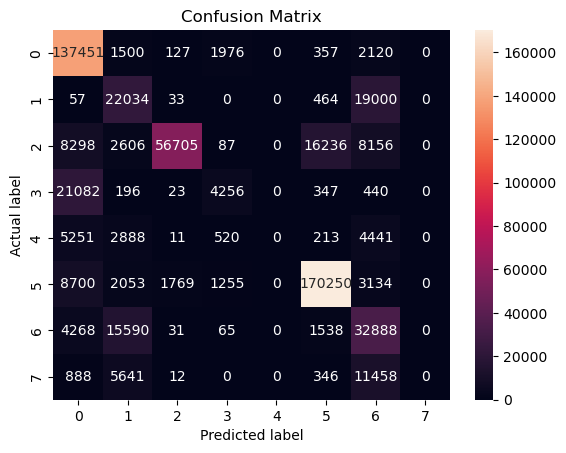

In [12]:
cm = confusion_matrix(y_svml_full_test, y_pred_svml_full)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [13]:
X_svml_wo_victim = data.drop(['Crime_Category_Code', 'Vict_Sex_M', 'Vict_Sex_X', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Vict_Age_Category_1',
       'Vict_Age_Category_2'], axis=1)  # Features
y_svml_wo_victim = data['Crime_Category_Code']

In [14]:
X_svml_wo_victim_train, X_svml_wo_victim_test, y_svml_wo_victim_train, y_svml_wo_victim_test = train_test_split(X_svml_wo_victim, y_svml_wo_victim, test_size=0.2, random_state=42)

In [15]:
svml_wo_victim_model = LinearSVC(dual = False)

In [16]:
svml_wo_victim_model.fit(X_svml_wo_victim_train,  y_svml_wo_victim_train)

LinearSVC(dual=False)

Accuracy: 0.6288


/Users/elijah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elijah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elijah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.72      0.97      0.83    143531
           1       0.39      0.36      0.37     41588
           2       0.00      0.00      0.00     92088
           3       0.00      0.00      0.00     26344
           4       0.00      0.00      0.00     13324
           5       0.70      0.91      0.79    187161
           6       0.38      0.69      0.49     54380
           7       0.00      0.00      0.00     18345

    accuracy                           0.63    576761
   macro avg       0.27      0.37      0.31    576761
weighted avg       0.47      0.63      0.53    576761



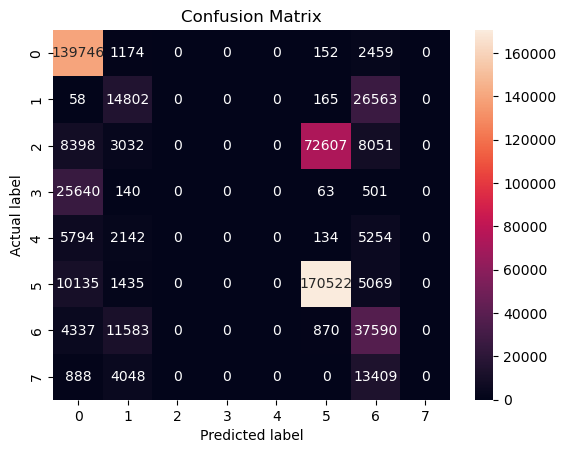

In [17]:
y_pred_wo_victim = svml_wo_victim_model.predict(X_svml_wo_victim_test)

# Accuracy
accuracy = accuracy_score(y_svml_wo_victim_test, y_pred_wo_victim)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_svml_wo_victim_test, y_pred_wo_victim))

# Confusion Matrix
cm = confusion_matrix(y_svml_wo_victim_test, y_pred_wo_victim)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
X_svml_wo_weather = data.drop(['Crime_Category_Code', 'Avg_Temp',
       'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure',
       'Total_Precipitation'], axis=1) 
y_svml_wo_weather = data['Crime_Category_Code']

In [19]:
X_svml_wo_weather_train, X_svml_wo_weather_test, y_svml_wo_weather_train, y_svml_wo_weather_test = train_test_split(X_svml_wo_weather, y_svml_wo_weather, test_size=0.2, random_state=42)

In [20]:
svml_wo_weather_model = LinearSVC(dual = False)

In [21]:
svml_wo_weather_model.fit(X_svml_wo_weather_train,  y_svml_wo_weather_train)

LinearSVC(dual=False)

Accuracy: 0.7339


/Users/elijah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elijah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elijah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.74      0.96      0.83    143531
           1       0.42      0.52      0.46     41588
           2       0.97      0.62      0.75     92088
           3       0.53      0.16      0.24     26344
           4       0.00      0.00      0.00     13324
           5       0.90      0.91      0.90    187161
           6       0.40      0.61      0.48     54380
           7       0.00      0.00      0.00     18345

    accuracy                           0.73    576761
   macro avg       0.49      0.47      0.46    576761
weighted avg       0.72      0.73      0.71    576761



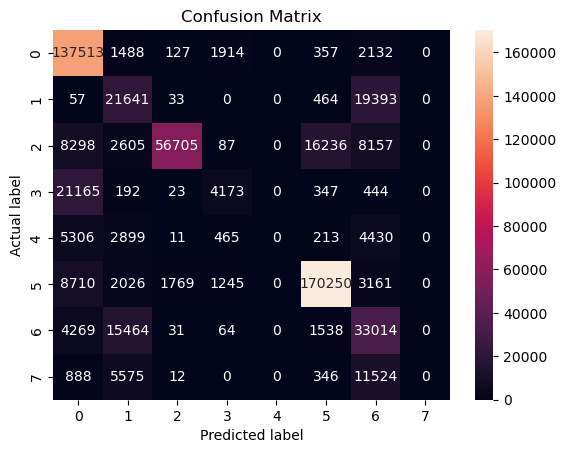

In [22]:
y_pred_wo_weather = svml_wo_weather_model.predict(X_svml_wo_weather_test)

# Accuracy
accuracy = accuracy_score(y_svml_wo_weather_test, y_pred_wo_weather)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_svml_wo_weather_test, y_pred_wo_weather))

# Confusion Matrix
cm = confusion_matrix(y_svml_wo_weather_test, y_pred_wo_weather)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

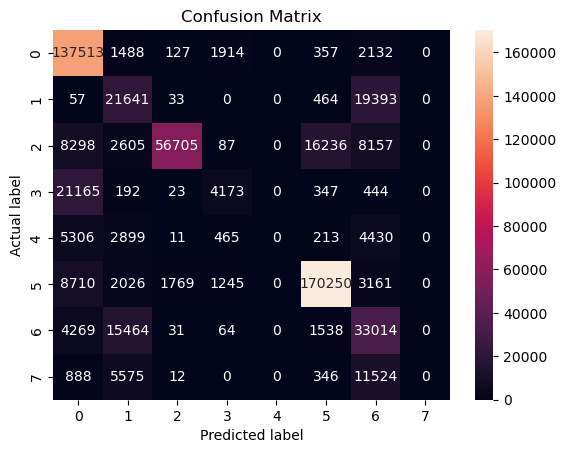

In [23]:
cm = confusion_matrix(y_svml_wo_weather_test, y_pred_wo_weather)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [24]:
X_svml_wo_weathervictim = data.drop(['Crime_Category_Code', 'Vict_Sex_M', 'Vict_Sex_X', 'Region_Ethnic_Origin_Black',
       'Region_Ethnic_Origin_Hispanic/Latin/Mexican',
       'Region_Ethnic_Origin_Other', 'Region_Ethnic_Origin_Unknown',
       'Region_Ethnic_Origin_White', 'Vict_Age_Category_1',
       'Vict_Age_Category_2', 'Crime_Category_Code', 'Avg_Temp',
       'Avg_Dewpoint', 'Avg_Humidity', 'Avg_Windspeed', 'Avg_Pressure',
       'Total_Precipitation'], axis=1)  # Features

y_svml_wo_weathervictim = data['Crime_Category_Code']

In [25]:
X_svml_wo_weathervictim_train, X_svml_wo_weathervictim_test, y_svml_wo_weathervictim_train, y_svml_wo_weathervictim_test = train_test_split(X_svml_wo_weathervictim, y_svml_wo_weathervictim, test_size=0.2, random_state=42)

In [26]:
svml_wo_weathervictim_model = LinearSVC(dual = False)

In [27]:
svml_wo_weathervictim_model.fit(X_svml_wo_weathervictim_train,  y_svml_wo_weathervictim_train)

LinearSVC(dual=False)

Accuracy: 0.6284


/Users/elijah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elijah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elijah/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.72      0.97      0.83    143531
           1       0.38      0.35      0.36     41588
           2       0.00      0.00      0.00     92088
           3       0.00      0.00      0.00     26344
           4       0.00      0.00      0.00     13324
           5       0.70      0.91      0.79    187161
           6       0.38      0.69      0.49     54380
           7       0.00      0.00      0.00     18345

    accuracy                           0.63    576761
   macro avg       0.27      0.37      0.31    576761
weighted avg       0.47      0.63      0.53    576761



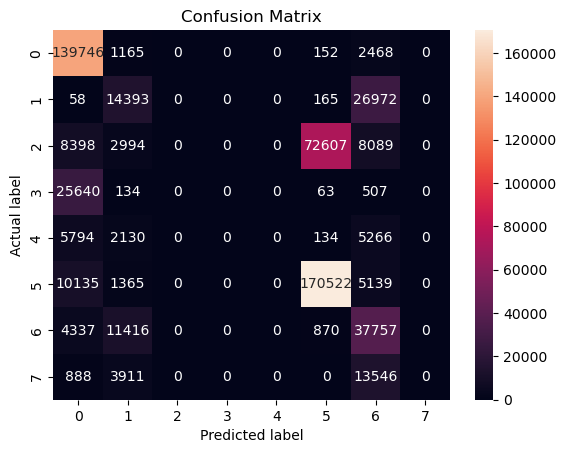

In [28]:
y_pred_wo_weathervictim = svml_wo_weathervictim_model.predict(X_svml_wo_weathervictim_test)

# Accuracy
accuracy = accuracy_score(y_svml_wo_weathervictim_test, y_pred_wo_weathervictim)
print(f"Accuracy: {accuracy:.4f}")

# Classification report
print(classification_report(y_svml_wo_weathervictim_test, y_pred_wo_weathervictim))

# Confusion Matrix
cm = confusion_matrix(y_svml_wo_weathervictim_test, y_pred_wo_weathervictim)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [29]:
coefs = np.abs(svml_full_model.coef_[0])  # Take absolute value to measure magnitude of importance
features = np.array(X_svml_full.columns)  # X should be your feature dataframe
full_importance = pd.DataFrame(coefs, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)

print(full_importance)


                                             Importance
Weapon_Reported                                1.728859
Part_1-2                                       0.784727
Vict_Age_Category_1                            0.354726
Vict_Age_Category_2                            0.278698
Region_Ethnic_Origin_Unknown                   0.255927
Region_Ethnic_Origin_Black                     0.210238
LAT                                            0.207129
Vict_Sex_X                                     0.179538
Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.124439
Year_2022                                      0.090815
LON                                            0.079985
Year_2020                                      0.079718
Year_2021                                      0.074690
Year_2023                                      0.070031
Region_Ethnic_Origin_White                     0.060513
Vict_Sex_M                                     0.048834
Year_2017                                      0

In [30]:
coefs = np.abs(svml_wo_weather_model.coef_[0])  # Take absolute value to measure magnitude of importance
features = np.array(X_svml_wo_weather.columns)  # X should be your feature dataframe
wo_weather_importance = pd.DataFrame(coefs, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)

print(wo_weather_importance)


                                             Importance
Weapon_Reported                                1.736679
Part_1-2                                       0.788657
Vict_Age_Category_1                            0.344806
Region_Ethnic_Origin_Unknown                   0.277060
LAT                                            0.260139
Vict_Age_Category_2                            0.239399
Region_Ethnic_Origin_Black                     0.227234
Vict_Sex_X                                     0.153477
Region_Ethnic_Origin_Hispanic/Latin/Mexican    0.142418
Year_2022                                      0.103489
LON                                            0.100812
Year_2020                                      0.099712
Year_2023                                      0.086773
Year_2021                                      0.085762
Region_Ethnic_Origin_White                     0.085304
Year_2017                                      0.071276
Year_2019                                      0

In [31]:
coefs = np.abs(svml_wo_victim_model.coef_[0])  # Take absolute value to measure magnitude of importance
features = np.array(X_svml_wo_victim.columns)  # X should be your feature dataframe
wo_victim_importance = pd.DataFrame(coefs, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)

print(wo_victim_importance)


                     Importance
Weapon_Reported        1.698244
Part_1-2               0.794706
LAT                    0.106619
Year_2022              0.063025
Year_2020              0.055392
Year_2021              0.050140
LON                    0.048205
Year_2023              0.040181
Month_12               0.036098
Month_3                0.034106
Day_of_Week_6          0.032844
Month_2                0.031126
Year_2017              0.027652
Year_2011              0.025746
Month_5                0.025730
Year_2019              0.024338
Avg_Pressure           0.023231
Month_4                0.019954
Month_11               0.019798
Day_of_Week_5          0.017342
Year_2015              0.016947
Year_2016              0.012584
Year_2013              0.012214
Month_9                0.011508
Total_Precipitation    0.011336
Month_8                0.011130
Year_2012              0.010783
Month_6                0.008432
Day_of_Week_4          0.007296
Year_2014              0.007059
Year_201

In [32]:
coefs = np.abs(svml_wo_weathervictim_model.coef_[0])  # Take absolute value to measure magnitude of importance
features = np.array(X_svml_wo_weathervictim.columns)  # X should be your feature dataframe
wo_weathervictim_importance = pd.DataFrame(coefs, index=features, columns=['Importance']).sort_values(by='Importance', ascending=False)

print(wo_weathervictim_importance)


                 Importance
Weapon_Reported    1.697272
Part_1-2           0.793235
LAT                0.136334
Year_2022          0.085083
Year_2020          0.074476
LON                0.061074
Year_2021          0.054555
Year_2023          0.050867
Month_7            0.049852
Month_5            0.049200
Year_2017          0.049198
Month_6            0.045981
Month_8            0.045003
Month_9            0.043442
Month_3            0.040231
Month_10           0.039082
Day_of_Week_6      0.038573
Month_11           0.037167
Year_2015          0.035877
Year_2019          0.035764
Month_12           0.035684
Month_4            0.035404
Month_2            0.029563
Year_2016          0.029222
Year_2011          0.027541
Year_2014          0.024361
Year_2018          0.021199
Day_of_Week_5      0.019111
Day_of_Week_4      0.009476
Day_of_Week_3      0.004793
Year_2012          0.003308
Year_2013          0.003058
Day_of_Week_1      0.002931
Day_of_Week_2      0.002651
AREA               0